# Bayesian Model Class Selection

### The Simple Idea: Picking the Best Tool for the Job

Imagine you have a messy room (your observed **data**, $D$), and you have several different cleaning tools (different **model classes**, $M_1, M_2, \ldots, M_{N_M}$). Each tool represents a different way to explain or "clean up" the mess.

*   **Model Class ($M_j$):** A specific type of explanation. For example, "the mess was made by a cat" ($M_1$), or "the mess was made by a toddler" ($M_2$), or "it's just accumulated dust" ($M_3$).
*   **Data ($D$):** The actual observations. For example, "knocked-over vase, muddy paw prints, ball of yarn."
*   **The Set of All Considered Models ($\mathfrak{M}$):** The collection of all tools you're considering: $\mathfrak{M} = \{M_1, M_2, M_3\}$.

**The Goal:** You want to figure out which tool (model class) is the most likely explanation for the messy room (data), given what you see and any prior beliefs you have about how likely each tool is to be the cause.

Bayesian model selection provides a formal way to:
1.  Quantify how well each model class explains the data.
2.  Incorporate any prior beliefs about the models.
3.  Calculate the updated probability (posterior probability) of each model class being the "true" one, after observing the data.

You then pick the model class with the highest posterior probability, or you might consider a few top contenders.

### Deepening into the Details

The core of Bayesian model class selection is Bayes' theorem, applied at the level of model classes. We want to calculate the **posterior probability of a model class $M_j$ given the data $D$ and the set of considered model classes $\mathfrak{M}$**, denoted as $P(M_j | D, \mathfrak{M})$.

The formula, as shown in your image (Equation 1.31), is:

$P(M_j | D, \mathfrak{M}) = \frac{p(D | M_j) P(M_j | \mathfrak{M})}{\sum_{i=1}^{N_M} p(D | M_i) P(M_i | \mathfrak{M})}$

Let's break down each term:

1.  **$P(M_j | D, \mathfrak{M})$: Posterior Probability of Model $M_j$**
    *   This is what we want to calculate. It represents our belief in model $M_j$ being the best explanation for the data $D$, *after* we have seen the data, considering it's one of the models in the set $\mathfrak{M}$.
    *   The model class with the highest posterior probability is considered the most plausible.

2.  **$p(D | M_j)$: Marginal Likelihood (or Evidence) for Model $M_j$**
    *   This is often the most crucial and computationally challenging term.
    *   It quantifies how well model $M_j$ predicts the observed data $D$, on average, over all possible parameter values within that model.
    *   Mathematically, if model $M_j$ has parameters $\theta_j$, then the marginal likelihood is calculated by integrating (or marginalizing) out these parameters:
        $p(D | M_j) = \int p(D | \theta_j, M_j) p(\theta_j | M_j) d\theta_j$
        *   $p(D | \theta_j, M_j)$ is the standard likelihood of the data given specific parameters $\theta_j$ under model $M_j$.
        *   $p(\theta_j | M_j)$ is the prior probability distribution of the parameters $\theta_j$ for model $M_j$.
    *   The marginal likelihood naturally penalizes model complexity (an "Occam's Razor" effect). A more complex model (with more parameters or wider parameter priors) has to spread its predictive power over a larger parameter space. To achieve a high marginal likelihood, it must provide a *significantly* better fit to the data to overcome this dilution.

3.  **$P(M_j | \mathfrak{M})$: Prior Probability of Model $M_j$**
    *   This represents our belief in model $M_j$ being the true model *before* observing any data, relative to the other models in the set $\mathfrak{M}$.
    *   If we have no reason to prefer one model over another initially, we often assign a uniform prior: $P(M_j | \mathfrak{M}) = 1/N_M$ for all $j$.
    *   These priors must sum to 1 over all models in $\mathfrak{M}$: $\sum_{j=1}^{N_M} P(M_j | \mathfrak{M}) = 1$.

4.  **$\sum_{i=1}^{N_M} p(D | M_i) P(M_i | \mathfrak{M})$: Normalization Constant (or Total Evidence for $\mathfrak{M}$)**
    *   This is the sum of the product of the marginal likelihood and prior probability for all models being considered.
    *   It ensures that the posterior probabilities $P(M_j | D, \mathfrak{M})$ sum to 1 over all $j$:
        $\sum_{j=1}^{N_M} P(M_j | D, \mathfrak{M}) = 1$.
    *   It represents the overall probability of observing the data $D$ given the entire set of models $\mathfrak{M}$ and their priors.

**In essence:** The posterior probability of a model is proportional to how well it explains the data (its marginal likelihood) multiplied by how much we believed in it beforehand (its prior probability). We then normalize these values across all considered models so they sum to one.

**Key Takeaway from the Text:**
The text emphasizes that models are approximations ("the model itself may not necessarily reproduce the observed system, but it is just an approximation"). Bayesian model selection helps us rank the "relative performance" of these candidate model classes in reproducing the data, providing "information about the relative extent of support" for each model.

---

## Python Code Example

Let's create a synthetic example. We'll generate data from a known underlying process (e.g., a quadratic function with noise) and then try to select between two candidate models: a linear model and a quadratic model.

For simplicity and to avoid complex numerical integration for the marginal likelihood $p(D|M_j)$, we'll use the **Bayesian Information Criterion (BIC)** as an approximation. The BIC for a model $M$ is given by:

$BIC = k \ln(n) - 2 \ln(\hat{L})$

where:
*   $n$ is the number of data points.
*   $k$ is the number of parameters in the model.
*   $\hat{L}$ is the maximized value of the likelihood function for the model (i.e., $p(D|\hat{\theta}_{MLE}, M)$).

The log marginal likelihood can be approximated by:
$\ln p(D|M) \approx \ln(\hat{L}) - \frac{k}{2} \ln(n) = -0.5 \times BIC$
So, $p(D|M) \approx \exp(-0.5 \times BIC)$.

Linear Model Results:
  Parameters (m,c): [1.38402793 0.88579274], Noise_std: 4.57
  Max Log Likelihood: -146.94
  Number of parameters (k including noise_std): 3
  BIC: 305.62

Quadratic Model Results:
  Parameters (a,b,c): [ 0.54283131  1.38404185 -3.82239735], Noise_std: 1.79
  Max Log Likelihood: -99.95
  Number of parameters (k including noise_std): 4
  BIC: 215.55

Marginal Likelihood (Linear, scaled): 2.755e-20
Marginal Likelihood (Quadratic, scaled): 1.000e+00

Posterior Probability (Linear Model): 0.0000
Posterior Probability (Quadratic Model): 1.0000


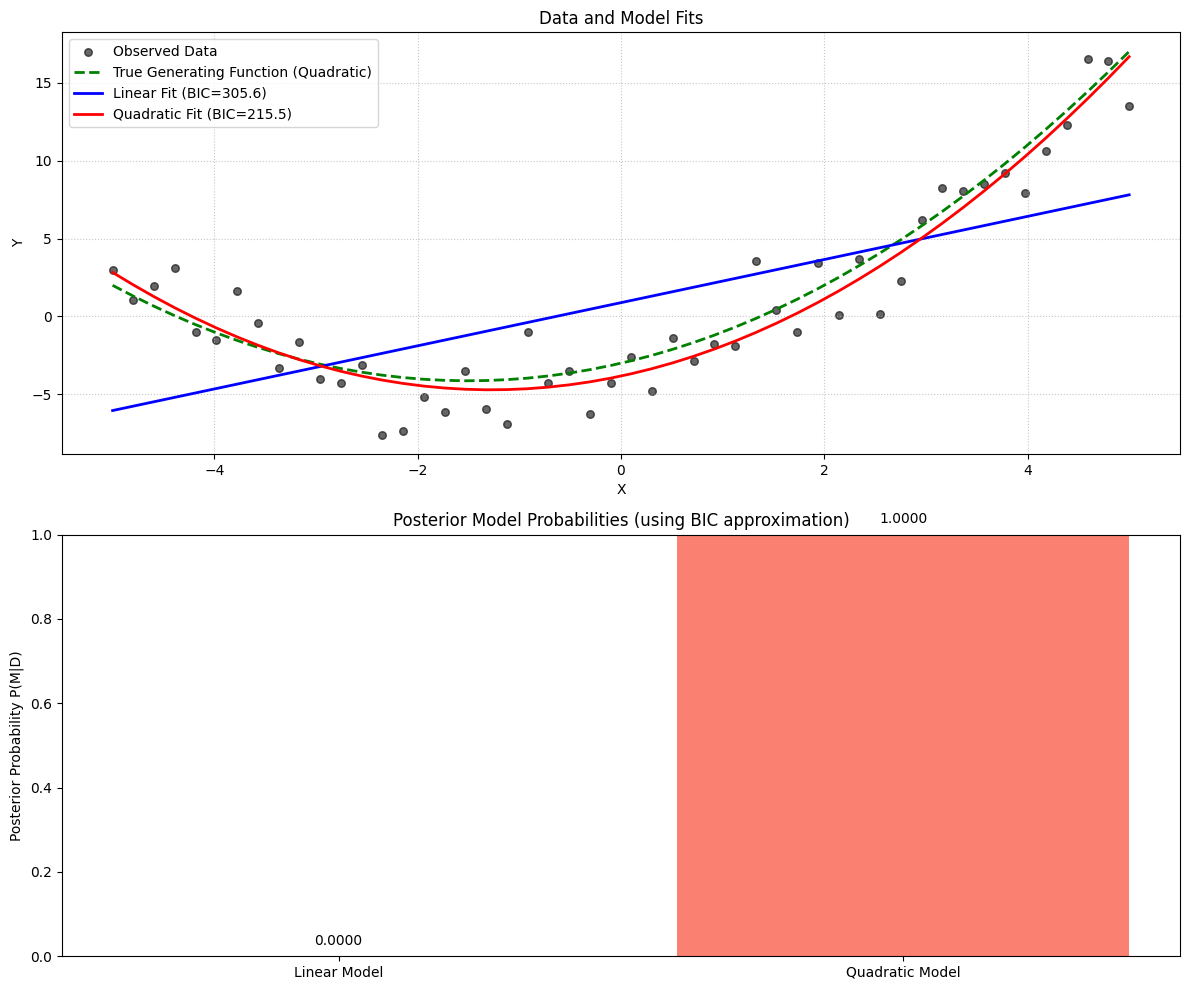


--- Varying N ---
N=10: Linear BIC=66.5, Quad BIC=42.9, P(Quad|D)=1.0000
N=20: Linear BIC=118.1, Quad BIC=95.3, P(Quad|D)=1.0000
N=50: Linear BIC=300.9, Quad BIC=216.7, P(Quad|D)=1.0000
N=100: Linear BIC=578.5, Quad BIC=437.4, P(Quad|D)=1.0000
N=200: Linear BIC=1161.7, Quad BIC=848.8, P(Quad|D)=1.0000


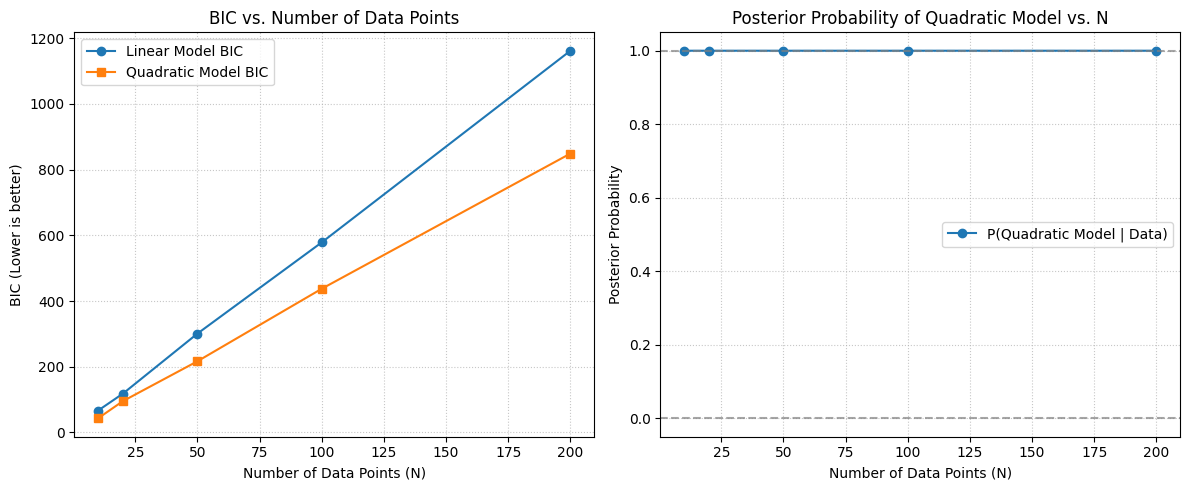

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# --- 1. Generate Synthetic Data ---
np.random.seed(42)
N_points = 50
X = np.linspace(-5, 5, N_points)

# True model is quadratic
a_true, b_true, c_true = 0.5, 1.5, -3
noise_std_true = 2.0
Y_true = a_true * X**2 + b_true * X + c_true
Y_observed = Y_true + np.random.normal(0, noise_std_true, N_points)

# --- 2. Define Model Structures and Likelihoods ---

# Model 1: Linear (M_linear: y = mx + c)
def linear_model(params, x):
    m, c = params
    return m * x + c

def neg_log_likelihood_linear(params, x, y_obs, noise_std):
    m, c = params
    y_pred = linear_model(params, x)
    # Assuming Gaussian likelihood
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# Model 2: Quadratic (M_quad: y = ax^2 + bx + c)
def quadratic_model(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

def neg_log_likelihood_quadratic(params, x, y_obs, noise_std):
    a, b, c = params
    y_pred = quadratic_model(params, x)
    # Assuming Gaussian likelihood
    log_likelihood = np.sum(norm.logpdf(y_obs, loc=y_pred, scale=noise_std))
    return -log_likelihood

# --- 3. Fit Models and Calculate BIC ---

# For BIC, we need an estimate of noise_std. We can estimate it from residuals,
# or fix it for simplicity, or treat it as a parameter.
# Let's estimate it as part of the optimization for each model,
# effectively adding one more parameter to optimize for.

def fit_and_calc_bic(model_func, neg_log_likelihood_func, initial_params, x_data, y_data, num_model_params):
    # The optimizer will also find the best noise_std
    # params_with_noise = initial_params + [assumed initial noise_std]
    
    # For simplicity, let's assume noise_std is known or estimated separately
    # and is the true one for calculating likelihoods.
    # In a more rigorous BIC, noise_std would be estimated and included in 'k' if not fixed.
    # Here, let's assume noise_std is fixed at the true value for likelihood calculation,
    # but not counted in k unless explicitly estimated as a free parameter.
    # For this example, let's fix noise_std for likelihood computation and only count structural params in k.
    
    # If noise_std were also a parameter to be fit, k would increment.
    # Let's re-define NLL to optimize for noise_std as well
    
    if model_func == linear_model: # m, c, noise_std
        def nll_for_opt(params_with_noise_std, x, y):
            model_p = params_with_noise_std[:-1]
            noise_s = params_with_noise_std[-1]
            if noise_s <= 0: return np.inf # Ensure noise_std is positive
            return neg_log_likelihood_linear(model_p, x, y, noise_s)
        k = num_model_params + 1 # m, c, AND sigma
        initial_params_with_noise = initial_params + [1.0] # initial guess for noise_std
            
    elif model_func == quadratic_model: # a, b, c, noise_std
        def nll_for_opt(params_with_noise_std, x, y):
            model_p = params_with_noise_std[:-1]
            noise_s = params_with_noise_std[-1]
            if noise_s <= 0: return np.inf
            return neg_log_likelihood_quadratic(model_p, x, y, noise_s)
        k = num_model_params + 1 # a, b, c AND sigma
        initial_params_with_noise = initial_params + [1.0]
    
    else:
        raise ValueError("Unknown model function")

    result = minimize(nll_for_opt, initial_params_with_noise, args=(x_data, y_data), method='Nelder-Mead')
    
    optimized_params_full = result.x
    optimized_model_params = optimized_params_full[:-1]
    optimized_noise_std = optimized_params_full[-1]
    
    max_log_likelihood = -result.fun # Minimized negative log likelihood
    
    n = len(x_data)
    bic = k * np.log(n) - 2 * max_log_likelihood
    
    y_pred = model_func(optimized_model_params, x_data)
    
    return {
        "params": optimized_model_params,
        "noise_std": optimized_noise_std,
        "max_log_likelihood": max_log_likelihood,
        "bic": bic,
        "k": k,
        "y_pred": y_pred
    }

# Fit Linear Model
initial_linear_params = [0.0, 0.0] # m, c
num_linear_model_params = 2
linear_results = fit_and_calc_bic(linear_model, neg_log_likelihood_linear, initial_linear_params, X, Y_observed, num_linear_model_params)

# Fit Quadratic Model
initial_quadratic_params = [0.0, 0.0, 0.0] # a, b, c
num_quadratic_model_params = 3
quadratic_results = fit_and_calc_bic(quadratic_model, neg_log_likelihood_quadratic, initial_quadratic_params, X, Y_observed, num_quadratic_model_params)

print("Linear Model Results:")
print(f"  Parameters (m,c): {linear_results['params']}, Noise_std: {linear_results['noise_std']:.2f}")
print(f"  Max Log Likelihood: {linear_results['max_log_likelihood']:.2f}")
print(f"  Number of parameters (k including noise_std): {linear_results['k']}")
print(f"  BIC: {linear_results['bic']:.2f}")

print("\nQuadratic Model Results:")
print(f"  Parameters (a,b,c): {quadratic_results['params']}, Noise_std: {quadratic_results['noise_std']:.2f}")
print(f"  Max Log Likelihood: {quadratic_results['max_log_likelihood']:.2f}")
print(f"  Number of parameters (k including noise_std): {quadratic_results['k']}")
print(f"  BIC: {quadratic_results['bic']:.2f}")


# --- 4. Calculate Approximate Marginal Likelihoods and Posterior Probabilities ---

# p(D|M_j) approx exp(-0.5 * BIC_j)
# Note: these values can be extremely small, so care must be taken with underflow
# if not working in log-space. For normalization, relative values matter.
# To avoid underflow/overflow, it's common to subtract the minimum BIC before exponentiating.
min_bic = min(linear_results['bic'], quadratic_results['bic'])

log_marginal_likelihood_linear_approx = -0.5 * (linear_results['bic'] - min_bic)
log_marginal_likelihood_quadratic_approx = -0.5 * (quadratic_results['bic'] - min_bic)

# Numerically stable way to get p(D|M_j) for normalization
marginal_likelihood_linear_scaled = np.exp(log_marginal_likelihood_linear_approx)
marginal_likelihood_quadratic_scaled = np.exp(log_marginal_likelihood_quadratic_approx)

# Model Priors P(M_j | M_set) - Assuming uniform priors
# M_set = {M_linear, M_quadratic}
prior_linear = 0.5
prior_quadratic = 0.5

# Numerator terms: p(D|M_j) * P(M_j | M_set)
numerator_linear = marginal_likelihood_linear_scaled * prior_linear
numerator_quadratic = marginal_likelihood_quadratic_scaled * prior_quadratic

# Denominator (Normalization): sum_i p(D|M_i) * P(M_i | M_set)
normalization_constant = numerator_linear + numerator_quadratic

# Posterior Model Probabilities P(M_j | D, M_set)
posterior_linear = numerator_linear / normalization_constant
posterior_quadratic = numerator_quadratic / normalization_constant

print(f"\nMarginal Likelihood (Linear, scaled): {marginal_likelihood_linear_scaled:.3e}")
print(f"Marginal Likelihood (Quadratic, scaled): {marginal_likelihood_quadratic_scaled:.3e}")
print(f"\nPosterior Probability (Linear Model): {posterior_linear:.4f}")
print(f"Posterior Probability (Quadratic Model): {posterior_quadratic:.4f}")


# --- 5. Plot Results ---
plt.figure(figsize=(12, 10))

# Plot 1: Data and Model Fits
plt.subplot(2, 1, 1)
plt.scatter(X, Y_observed, label='Observed Data', color='black', s=30, alpha=0.6, zorder=1)
plt.plot(X, Y_true, label='True Generating Function (Quadratic)', color='green', linestyle='--', linewidth=2, zorder=2)
plt.plot(X, linear_results['y_pred'], label=f"Linear Fit (BIC={linear_results['bic']:.1f})", color='blue', linewidth=2, zorder=3)
plt.plot(X, quadratic_results['y_pred'], label=f"Quadratic Fit (BIC={quadratic_results['bic']:.1f})", color='red', linewidth=2, zorder=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Model Fits')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# Plot 2: Posterior Model Probabilities
plt.subplot(2, 1, 2)
models = ['Linear Model', 'Quadratic Model']
posteriors = [posterior_linear, posterior_quadratic]
bars = plt.bar(models, posteriors, color=['skyblue', 'salmon'])
plt.ylabel('Posterior Probability P(M|D)')
plt.title('Posterior Model Probabilities (using BIC approximation)')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- Demonstration with varying N ---
N_values = [10, 20, 50, 100, 200]
posterior_quad_over_N = []
bic_linear_over_N = []
bic_quad_over_N = []

print("\n--- Varying N ---")
for n_val in N_values:
    X_n = np.linspace(-5, 5, n_val)
    Y_true_n = a_true * X_n**2 + b_true * X_n + c_true
    Y_observed_n = Y_true_n + np.random.normal(0, noise_std_true, n_val)

    lin_res_n = fit_and_calc_bic(linear_model, neg_log_likelihood_linear, initial_linear_params, X_n, Y_observed_n, num_linear_model_params)
    quad_res_n = fit_and_calc_bic(quadratic_model, neg_log_likelihood_quadratic, initial_quadratic_params, X_n, Y_observed_n, num_quadratic_model_params)
    
    bic_linear_over_N.append(lin_res_n['bic'])
    bic_quad_over_N.append(quad_res_n['bic'])

    min_bic_n = min(lin_res_n['bic'], quad_res_n['bic'])
    log_ml_lin_n = -0.5 * (lin_res_n['bic'] - min_bic_n)
    log_ml_quad_n = -0.5 * (quad_res_n['bic'] - min_bic_n)
    
    ml_lin_n_scaled = np.exp(log_ml_lin_n)
    ml_quad_n_scaled = np.exp(log_ml_quad_n)
    
    num_lin_n = ml_lin_n_scaled * prior_linear
    num_quad_n = ml_quad_n_scaled * prior_quadratic
    norm_const_n = num_lin_n + num_quad_n
    
    post_quad_n = num_quad_n / norm_const_n
    posterior_quad_over_N.append(post_quad_n)
    print(f"N={n_val}: Linear BIC={lin_res_n['bic']:.1f}, Quad BIC={quad_res_n['bic']:.1f}, P(Quad|D)={post_quad_n:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(N_values, bic_linear_over_N, 'o-', label='Linear Model BIC')
plt.plot(N_values, bic_quad_over_N, 's-', label='Quadratic Model BIC')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('BIC (Lower is better)')
plt.title('BIC vs. Number of Data Points')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(N_values, posterior_quad_over_N, 'o-', label='P(Quadratic Model | Data)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Quadratic Model vs. N')
plt.ylim(-0.05, 1.05)
plt.axhline(1.0, color='gray', linestyle='--', alpha=0.7)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

**Explanation of the Code:**

1.  **Generate Data:** We create synthetic data from a quadratic function with added Gaussian noise. This way, we know the "true" underlying model.
2.  **Define Models:**
    *   `linear_model`: $y = mx + c$. It has 2 structural parameters.
    *   `quadratic_model`: $y = ax^2 + bx + c$. It has 3 structural parameters.
3.  **Likelihood Functions:** `neg_log_likelihood_linear` and `neg_log_likelihood_quadratic` calculate the negative log-likelihood assuming Gaussian errors. The `fit_and_calc_bic` function also optimizes for the noise standard deviation (`noise_std`), effectively making it a parameter of each model. So the total number of parameters `k` for BIC includes this noise parameter.
4.  **Fit Models & Calculate BIC:**
    *   `scipy.optimize.minimize` is used to find the parameters (including `noise_std`) that maximize the likelihood (minimize the negative log-likelihood) for each model.
    *   The BIC is calculated for each model. A lower BIC generally indicates a better model, balancing fit and complexity.
5.  **Marginal Likelihood Approximation:** We use $p(D|M_j) \approx \exp(-0.5 \times BIC_j)$. To handle potentially very small or large numbers from the exponentiation, the BICs are shifted by `min_bic` before exponentiation. This scaling doesn't affect the final posterior probabilities as it cancels out during normalization.
6.  **Priors:** We assume uniform prior probabilities for the models ($P(M_{linear}|\mathfrak{M}) = 0.5$, $P(M_{quadratic}|\mathfrak{M}) = 0.5$).
7.  **Posterior Probabilities:** Calculated using the formula.
8.  **Plots:**
    *   The first plot shows the raw data, the true generating function, and the fits from both the linear and quadratic models, along with their BICs.
    *   The second plot is a bar chart showing the calculated posterior probabilities for each model.
    *   The third set of plots shows how BIC and the posterior probability of the (true) quadratic model change as the number of data points ($N$) increases. Generally, with more data, the evidence for the correct model becomes stronger.

**Interpreting the Output:**
When you run the code, you'll typically see that the quadratic model has a lower BIC and a much higher posterior probability than the linear model, especially as $N$ increases. This is because the data was generated from a quadratic process, and the Bayesian model selection framework (even with the BIC approximation) correctly identifies the more appropriate model class. The BIC penalizes the quadratic model for its extra parameter, but the significantly better fit to the data usually outweighs this penalty when the underlying process is indeed quadratic. The plots showing the effect of $N$ demonstrate that with more data, our confidence in selecting the correct model generally increases.

This example illustrates the core concepts: defining models, quantifying how well they fit the data while penalizing complexity (via BIC as a proxy for marginal likelihood), incorporating prior beliefs (here, uniform), and deriving posterior probabilities to select the "best" model class among the candidates.